In [1]:
## Tutorial OverView
## 1. Statistical Imputation
## 2. Horse Colic Dataset
## 3. Statistical Imputation with SimpleImputer

### Statistical Imputation

In [3]:
## Common Statistics calculated included
## 1. The Column Mean value
## 2. The Column Median Value
## 3. The Column Mode value
## 4. A constant Value

import pandas as pd
import numpy as np

#Loading the dataset replace ? with NaN
data  = pd.read_csv('horse-colic.csv',header=None,na_values="?")

#summarize the first few rows 
print(data.head())

# Summarize the missing the values in each columns

for i in range(data.shape[1]):
    n_miss = data[[i]].isnull().sum()
    perc = n_miss/data.shape[0] *100
    print('> %d , Missing :%d (%.1f%%)'%(i,n_miss,perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0 , Missing :1 (0.3%)
> 1 , Missing :0 (0.0%)
> 2 , Missing :0 (0.0%)
> 3 , Missing :60 (20.0%)
> 4 , Missing :24 (8.0%)
> 5 , Missing :58 (19.3%)
> 6 , Missing :56 (18.7%)
> 7 , Missing :69 (23.0%)
> 8 , Missing :47 (15.7%)
> 9 , Missing :32 (10.7

####  Statistical Imputation with Simple Imputer

In [9]:
### statistical Imputation transform for Horse-Colic data
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#loading data
dataframe =  pd.read_csv('horse-colic.csv',header=None,na_values='?')

#Split into input output elements
data = dataframe.values

ix = [i for i in range(dataframe.shape[1]) if i != 23]

X = data[:,:-1]
y = data[:,-1]

#Summarize total missing
print('Missing : %d '% np.sum(np.isnan(X)))

#define Imputer

imputer = SimpleImputer(strategy="mean")

#fit the imputer
imputer.fit(X)

#Transform the dataset

Xtran = imputer.transform(X)

#Summarize the total missing
print('Missing : %d '% np.sum(np.isnan(Xtran)))

###Using K fold cross validation

# define model pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy="mean")
pipeline = Pipeline(steps=[("i",imputer),('m',model)])

#define model evaluation

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

# evaluate model
scores = cross_val_score(pipeline,X,y,scoring="accuracy",cv=cv,n_jobs=-1)

print("Mean accuracy : %.3f (%.3f)"%(np.mean(scores),np.std(scores)))


Missing : 1605 
Missing : 0 
Mean accuracy : 0.840 (0.054)


### Computed Different Imputed Statistics

Missing : 1605 
Missing : 0 
>mean accuracy : 0.846 (0.048)
>median accuracy : 0.822 (0.054)
>most_frequent accuracy : 0.823 (0.052)
>constant accuracy : 0.872 (0.045)


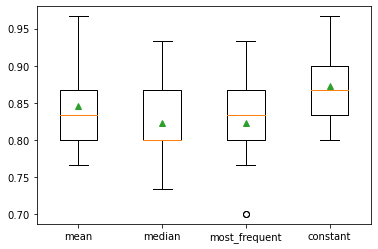

In [12]:
### statistical Imputation transform for Horse-Colic data
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
#loading data
dataframe =  pd.read_csv('horse-colic.csv',header=None,na_values='?')

#Split into input output elements
data = dataframe.values

ix = [i for i in range(dataframe.shape[1]) if i != 23]

X = data[:,:-1]
y = data[:,-1]

#Summarize total missing
print('Missing : %d '% np.sum(np.isnan(X)))

#define Imputer

imputer = SimpleImputer(strategy="mean")

#fit the imputer
imputer.fit(X)

#Transform the dataset

Xtran = imputer.transform(X)

#Summarize the total missing
print('Missing : %d '% np.sum(np.isnan(Xtran)))

###Using K fold cross validation
results = list()
strategies = ["mean","median","most_frequent","constant"]

for s in strategies:
    # define model pipeline
    model = RandomForestClassifier()
    imputer = SimpleImputer(strategy=s)
    pipeline = Pipeline(steps=[("i",imputer),('m',model)])

    #define model evaluation

    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

    # evaluate model
    scores = cross_val_score(pipeline,X,y,scoring="accuracy",cv=cv,n_jobs=-1)
    results.append(scores)
    print(">%s accuracy : %.3f (%.3f)"%(s,np.mean(scores),np.std(scores)))

# plot model performance for comparision
plt.boxplot(results,labels=strategies,showmeans=True)
plt.show()

### Simple Imputer While making predictions

In [16]:
###Define raw data
raw = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

### statistical Imputation transform for Horse-Colic data
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#loading data
dataframe =  pd.read_csv('horse-colic.csv',header=None,na_values='?')

#Split into input output elements
data = dataframe.values

ix = [i for i in range(dataframe.shape[1]) if i != 23]

X = data[:,:-1]
y = data[:,-1]

#Summarize total missing
print('Missing : %d '% np.sum(np.isnan(X)))


#Summarize the total missing
print('Missing : %d '% np.sum(np.isnan(Xtran)))

###Using K fold cross validation

# define model pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy="constant")
pipeline = Pipeline(steps=[("i",imputer),('m',model)])

#fit the model
pipeline.fit(X,y)

#predict the model
ypred = pipeline.predict([raw])

# evaluate model

print("Predicted Class : %d"%(ypred))


Missing : 1605 
Missing : 0 
Predicted Class : 2
